In [1]:
from pathlib import Path

import anndata as ad
import matplotlib.pyplot as plt
import networkx as nx
import scanpy as sc
import squidpy as sq

In [2]:
results_dir = Path("./results")
fig_dir = results_dir / "figures"

data_dir = Path("./data")
sdm_dir = data_dir / "sdmbench"
dlpfc_dir = data_dir / "LIBD_DLPFC"

In [3]:
fig_dir.mkdir(parents=True, exist_ok=True)

In [4]:
style_kwargs = {"node_size": 30, "width": 1.5, "edge_color": (0.3, 0.3, 0.3, 0.5)}

# UMAP

In [5]:
adata = ad.read_h5ad(sdm_dir / "E10.5_E2S1.MOSTA.h5ad")

sc.pp.subsample(adata, fraction=0.025)
sc.pp.neighbors(adata, n_neighbors=5)

/dh-projects/ag-ishaque/analysis/muellni/envs/spatialleiden/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
graph = nx.from_scipy_sparse_array(adata.obsp["connectivities"])

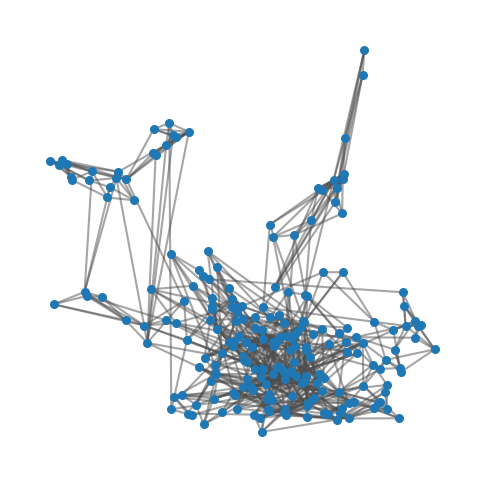

In [7]:
fig_umap, ax = plt.subplots(figsize=(6, 6))

nx.draw(graph, pos=adata.obsm["X_umap"][:, :2], **style_kwargs)

In [8]:
fig_umap.savefig(fig_dir / "Fig_umap.pdf", dpi=600)

# Stereo-seq grid

In [9]:
adata = ad.read_h5ad(sdm_dir / "E10.5_E2S1.MOSTA.h5ad")

x, y = adata.obsm["spatial"].T

adata = adata[(x > -130) & (x < -120) & (y > -170) & (y < -160)].copy()

sq.gr.spatial_neighbors(adata, coord_type="grid", n_neighs=4)

In [10]:
graph = nx.from_scipy_sparse_array(adata.obsp["spatial_connectivities"])

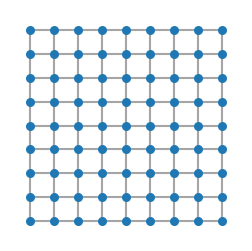

In [11]:
fig_umap, ax = plt.subplots(figsize=(3, 3))

nx.draw(graph, pos=adata.obsm["spatial"], **style_kwargs)

In [12]:
fig_umap.savefig(fig_dir / "Fig_square_grid.pdf", dpi=600)

# Visium grid

In [13]:
from leiden_utils import get_anndata

In [14]:
adata = get_anndata(dlpfc_dir / "Br8100_151673")

x, y = adata.obsm["spatial"].T

adata = adata[(x > 5000) & (x < 6000) & (y > 5000) & (y < 6000)].copy()

sq.gr.spatial_neighbors(adata, coord_type="grid", n_neighs=6)

In [15]:
graph = nx.from_scipy_sparse_array(adata.obsp["spatial_connectivities"])

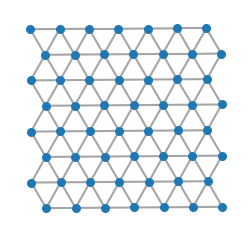

In [16]:
fig_umap, ax = plt.subplots(figsize=(3, 3))

nx.draw(graph, pos=adata.obsm["spatial"], **style_kwargs)
_ = ax.set(aspect=1)

In [17]:
fig_umap.savefig(fig_dir / "Fig_isometric_grid.pdf", dpi=600)

# kNN 100

In [18]:
adata = ad.read_h5ad(sdm_dir / "MERFISH_0.24.h5ad")

x, y = adata.obsm["spatial"].T

adata = adata[(x > -3500) & (x < -3250) & (y > -3500) & (y < -3250)].copy()

sq.gr.spatial_neighbors(adata, coord_type="generic", n_neighs=10)

In [19]:
graph = nx.from_scipy_sparse_array(adata.obsp["spatial_connectivities"])

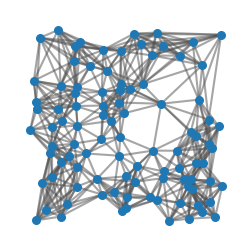

In [20]:
fig_umap, ax = plt.subplots(figsize=(3, 3))

nx.draw(graph, pos=adata.obsm["spatial"], **style_kwargs)

In [21]:
fig_umap.savefig(fig_dir / "Fig_kNN10.pdf", dpi=600)

# Delaunay

In [22]:
sq.gr.spatial_neighbors(adata, delaunay=True)

In [23]:
graph = nx.from_scipy_sparse_array(adata.obsp["spatial_connectivities"])

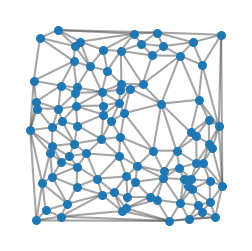

In [24]:
fig_umap, ax = plt.subplots(figsize=(3, 3))

nx.draw(graph, pos=adata.obsm["spatial"], **style_kwargs)

In [25]:
fig_umap.savefig(fig_dir / "Fig_delaunay.pdf", dpi=600)